# Aggregation

In [26]:
import pandas as pd
from dfply import *

## What is aggregation?

The act of collapsing many rows into few rows.

## Example - Baseball pitching

In [27]:
pitching_raw = pd.read_csv('./data/baseball/core/Pitching.csv') 
pitching = (pitching_raw >>
             mutate(id = pitching_raw.index))
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,id
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,7,NaN,0,146.0,0,42,NaN,NaN,NaN,0
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,7,NaN,0,1291.0,0,292,NaN,NaN,NaN,1
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,2,NaN,0,14.0,0,9,NaN,NaN,NaN,2
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,20,NaN,0,1080.0,1,257,NaN,NaN,NaN,3
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,0,NaN,0,57.0,0,21,NaN,NaN,NaN,4


## Simple Aggregation

A **simple aggregation** collapses all rows into one row.

<img src="./img/simple_aggregation.png" width=800>

## Simple aggregation with `dfply.summarise`

In [37]:
(pitching >>
  summarise(mean_era = mean(X.ERA),
            sd_era = sd(X.ERA),
            max_wins = X.W.max(),
            min_wins = X.W.min()))

,mean_era,sd_era,max_wins,min_wins
0,5.11792,5.466654,60,0


In [12]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  47628 non-null  object 
 1   yearID    47628 non-null  int64  
 2   stint     47628 non-null  int64  
 3   teamID    47628 non-null  object 
 4   lgID      47496 non-null  object 
 5   W         47628 non-null  int64  
 6   L         47628 non-null  int64  
 7   G         47628 non-null  int64  
 8   GS        47628 non-null  int64  
 9   CG        47628 non-null  int64  
 10  SHO       47628 non-null  int64  
 11  SV        47628 non-null  int64  
 12  IPouts    47628 non-null  int64  
 13  H         47628 non-null  int64  
 14  ER        47628 non-null  int64  
 15  HR        47628 non-null  int64  
 16  BB        47628 non-null  int64  
 17  SO        47628 non-null  int64  
 18  BAOpp     43187 non-null  float64
 19  ERA       47534 non-null  float64
 20  IBB       33050 non-null  fl

## <font color="red"> Exercise 1 </font>

The [dead ball era](https://en.wikipedia.org/wiki/Dead-ball_era) in MLB includes the year from about 1900 to 1918, which was known for a low number of runs per game.  After this period, the number of runs per game increased dramatically and one possible reason for this change was a changes made to the baseball at the start of the 1920 season.    

**Tasks:** Complete that following tasks using `pandas` and `dfply`

* Compute the average runs allowed per pitcher (column `R`) for the following two ranges of years: 
    * 1900-1919 and 
    * 1920-1939.  
* Is there evidence of a difference in the number of runs allowed for each era?

In [38]:
# Your code here
from more_dfply import ifelse


deadball_question_avgs = (pitching
        >> filter_by((X.yearID >= 1900) & (X.yearID < 1940)) 
        >> mutate(era = case_when(
                    (X["yearID"] < 1921, "dead ball"),
                    (X["yearID"] >= 1920, "after dead ball") ))
        >> group_by(X.era)
        >> summarise(mean_runs = mean(X.R)))

deadball_question_avgs
       


/home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/dfply/vector.py:110: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  return coalescer.lookup(np.arange(coalescer.shape[0]), min_nonna)


,era,mean_runs
0,after dead ball,55.547394
1,dead ball,49.739488


6 runs seems like a decent amount, but not an absolute ton. After dead ball only saw about a 10% in runs allowed by the average pitcher

## Group and Aggregate

Group and aggregate

* combines multiple filter + aggregates
* considers all possible groups.

<img src="./img/group_and_aggregate.png" width=800>

## Using `ifelse` to classify the years

In [39]:
#from more_dfply import ifelse
#eras = (pitching
#        >> filter_by((X.yearID >= 1900) & (X.yearID < 1940))
#        >> mutate(era = ifelse(X.yearID < 1920, 
#                               "dead ball", 
#                               "after dead ball"))
#       )

#eras >> head

<img src="./img/filter_group_aggregate.png" width=800>

What we did here is actually `filter + groupby + aggregate`

## Using `dfply.group_by` and `dfply.summarise` 

In [40]:
#mean_runs = (eras
#             >> group_by(X.era)
#             >> summarise(mean_runs = mean(X.R)))
#mean_runs

## Visualizing the data with `seaborn`

<AxesSubplot:xlabel='era', ylabel='mean_runs'>

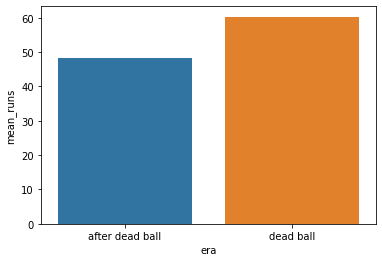

In [11]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
sns.barplot(x = "era", y="mean_runs", data=mean_runs)

## <font color="red"> Exercise 3 </font>

Compose the two queries into one piped expression (filter + mutate + group_by + summarise)

In [42]:
# looks like I was a bit ahead
from more_dfply import ifelse


deadball_question_avgs = (pitching
        >> filter_by((X.yearID >= 1900) & (X.yearID < 1940)) 
        >> mutate(era = case_when(
                    (X["yearID"] < 1921, "dead ball"),
                    (X["yearID"] >= 1920, "after dead ball") ))
        >> group_by(X.era)
        >> summarise(mean_runs = mean(X.R)))


deadball_question_avgs

/home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/dfply/vector.py:110: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  return coalescer.lookup(np.arange(coalescer.shape[0]), min_nonna)


,era,mean_runs
0,after dead ball,55.547394
1,dead ball,49.739488


## Grouping by more than one category

* `group_by` accepts multiple columns
* Groups all combinations

## Example - Find all teams with 100+ wins in a season

#### `pandas` + `dfply`

In [15]:
(pitching
 >> select(X.yearID, X.teamID, X.W)
 >> group_by(X.yearID, X.teamID)
 >> summarise(total_wins = X.W.sum())
 >> ungroup
 >> filter_by(X.total_wins >= 100)
 >> arrange(X.yearID, X.total_wins, ascending=False)
 >> head
)

,teamID,yearID,total_wins
2905,HOU,2019,107
2908,LAN,2019,106
2912,NYA,2019,103
2911,MIN,2019,101
2868,BOS,2018,108


## So Iverson ... what's up with the `ungroup`?

* `pandas` messes with the `df.index` to group
* `dfply` adds a `_group_by` attribute to make this work without reindexing
* `ungroup` clears this attribute
* Do this before manipulating the resulting `df`

In [16]:
import numpy as np
df = pd.DataFrame({'group': ['A', 'B', 'C'],
                   'value': [1,2,3]
                  })
(df
 >> group_by(X.group))._grouped_by

['group']

In [17]:
(df
 >> group_by(X.group)
 >> ungroup)._grouped_by

## The last comparison might not be fair

Comparison is only fair if pitchers all pitch the same number of outs/games/innings.  Let's see if there is a difference between the eras in terms of outs pitched (`IPouts`).

In [18]:
mean_outs = (pitching
             >> select(X.IPouts, X.yearID)
             >> filter_by((X.yearID >= 1900) & (X.yearID < 1940))
             >> mutate(era = ifelse(X.yearID < 1920, 
                                    "dead ball", 
                                    "after dead ball"))
             >> group_by(X.era)
             >> summarise(mean_outs = mean(X.IPouts)))
mean_outs

,era,mean_outs
0,after dead ball,308.190136
1,dead ball,390.134259


<AxesSubplot:xlabel='era', ylabel='mean_outs'>

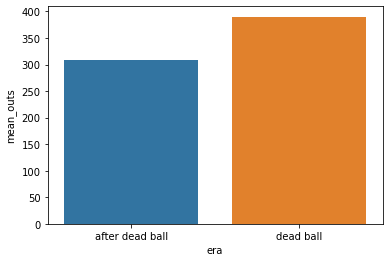

In [19]:
sns.barplot(x = "era", y="mean_outs", data=mean_outs)

## A more fair comparison

Instead of comparing the era's on a per-pitcher basis, let's compare on a per year basis.  We will

1. Compute the total runs and total IPouts per year.
2. Compute the ratio of these totals for each year.
3. Compute the average value of the ratio for each era

In [20]:
mean_runs_per_out = (pitching
                     >> select(X.IPouts, X.yearID, X.R)
                     >> filter_by((X.yearID >= 1900) & (X.yearID < 1940))
                     >> group_by(X.yearID)
                     >> summarise(total_runs = X.R.sum(),
                                  total_ipouts = X.IPouts.sum())
                     >> ungroup
                     >> mutate(runs_per_out = X.total_runs/X.total_ipouts,
                               era = ifelse(X.yearID < 1920, 
                                            "dead ball", 
                                            "after dead ball"))
                     >> group_by(X.era)
                     >> summarise(mean_runs_per_out = mean(X.runs_per_out))
                    )
mean_runs_per_out

,era,mean_runs_per_out
0,after dead ball,0.182218
1,dead ball,0.149920


<AxesSubplot:xlabel='era', ylabel='mean_runs_per_out'>

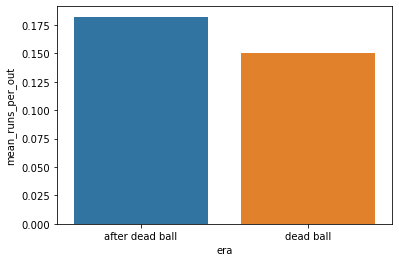

In [21]:
sns.barplot(x = "era", y="mean_runs_per_out", data=mean_runs_per_out)

## <font color="red"> Exercise 4 </font>

It would be easier to understand this result if we were computing runs on a per-game basis.  Redo the last problem, both this time compute `mean_runs_per_9_innings`.  **Hint:** There are 27 outs in a 9 inning game.

In [45]:
mean_runs_per_out = (pitching
                     >> select(X.IPouts, X.yearID, X.R)
                     >> filter_by((X.yearID >= 1900) & (X.yearID < 1940))
                     >> group_by(X.yearID)
                     >> summarise(total_runs = X.R.sum(),
                                  total_ipouts = X.IPouts.sum())
                     >> ungroup
                     >> mutate(runs_per_inning = (X.total_runs/X.total_ipouts)*27,
                           era = case_when(
                            (X["yearID"] < 1921, "dead ball"),
                            (X["yearID"] >= 1920, "after dead ball") ))
                     >> group_by(X.era)
                     >> summarise(mean_runs_per_inning = mean(X.runs_per_inning))
                    )
mean_runs_per_out

/home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/dfply/vector.py:110: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  return coalescer.lookup(np.arange(coalescer.shape[0]), min_nonna)


,era,mean_runs_per_inning
0,after dead ball,4.949708
1,dead ball,4.062396


## <font color="red"> Exercise 5 </font>

Compute and plot the average home runs per game allowed per year for all years in the pitching table.  To accomplish this task, you should

1. Aggregate total `HR` and `IPouts` for each year.
1. Create a `games_pitched`, which is computed by dividing total inning pitched outs `IPouts` by 27, the number of outs in a game.
2. Create a `hr_per_game` column by dividing the total `HR` for each year by `games_pitched` for each year.
4. Make line plot of the results. You will need to create a new column `HR_per_inning` then perform the group and aggregate. You can use [seaborn's lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to make the graph.

In [56]:
# Your refactored code here

#for all years in table, not just 1900-1940

home_runs_pergame = (pitching
    >> select(X["IPouts"], X["yearID"], X["HR"])
    >> group_by(X.yearID)
    >> summarise(total_runs = X["HR"].sum(),
                 total_ipouts = X["IPouts"].sum())
    >> ungroup
    >> mutate(games_pitched = X["total_ipouts"]/27)
    >> mutate(hr_pergame = X["total_runs"]/X["games_pitched"])

)

home_runs_pergame



,yearID,total_runs,total_ipouts,games_pitched,hr_pergame
0,1871,47,6750,250.000000,0.188000
1,1872,37,9858,365.111111,0.101339
2,1873,47,10754,398.296296,0.118003
3,1874,40,12509,463.296296,0.086338
4,1875,40,18571,687.814815,0.058155
...,...,...,...,...,...
144,2015,4909,130223,4823.074074,1.017816
145,2016,5610,129919,4811.814815,1.165880
146,2017,6105,129771,4806.333333,1.270199
147,2018,5585,130467,4832.111111,1.155810


<AxesSubplot:xlabel='yearID', ylabel='hr_pergame'>

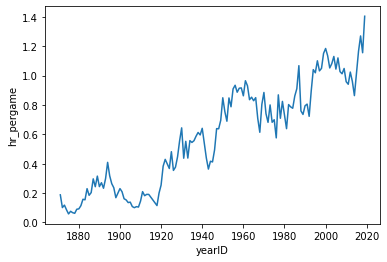

In [58]:
import seaborn as sns

sns.lineplot(data=home_runs_pergame, x="yearID", y="hr_pergame")